<a href="https://colab.research.google.com/github/Liamdev631/FFSNN/blob/main/FFSNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulating 0.1 seconds of activity over 100 cycles.


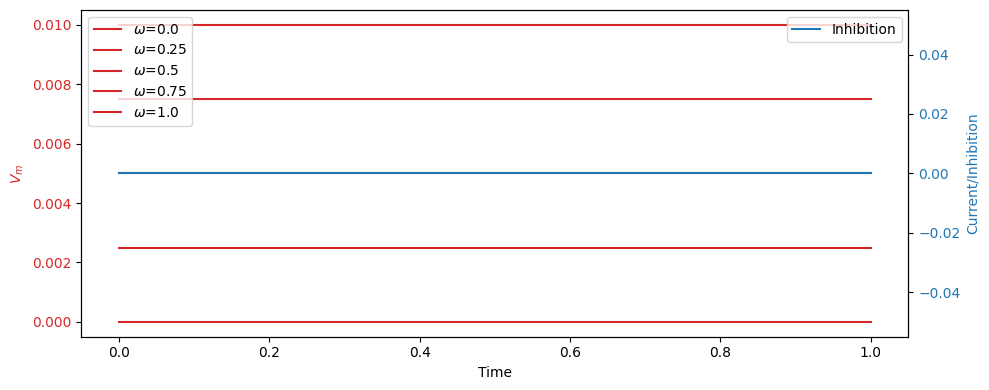

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class LIFLayer(nn.Module):
    def __init__(self, weights, dt=1e-2, threshold=1.0, tau_v=1e-2, tau_inhibitory=1e-2, inhibitory_scale=0.1):
        super(LIFLayer, self).__init__()
        self.weights = weights
        self.dt = dt
        self.threshold = threshold
        self.tau_v = tau_v
        self.inhibitory_scale = inhibitory_scale
        self.tau_inhibitory = tau_inhibitory

        self.state = torch.zeros(weights.shape[0])
        self.inhibitory_state = torch.zeros(1)

    def forward(self, x):
        # Calculate v
        x = x * self.weights
        dv_dt = -self.state / self.tau_v + x - self.inhibitory_state
        self.state += dv_dt * self.dt

        # Check for spiking activity
        spikes = self.state > self.threshold

        # Update astrocyte state
        d_inhibition = -self.inhibitory_state * self.dt / self.tau_inhibitory
        self.inhibitory_state += d_inhibition * dt + torch.sum(spikes.int()) * self.inhibitory_scale

        # clamp
        self.state[spikes] = 0
        self.state[self.state < 0] = 0

        return spikes

dt: float = 1e-3
runtime: float = 0.1
N: int = 5
T: int = int(runtime / dt)
print(f'Simulating {runtime} seconds of activity over {T} cycles.')

# create a layer of N neurons
#weights = torch.rand(size=(1, N))
weights = torch.linspace(0, 1, steps=N)
lif_layer = LIFLayer(weights)

# create a step input of size T
step_input = torch.ones((T, 1), dtype=torch.float)

# Preallocate tensor storage for outputs and inhibitory_states
outputs = torch.zeros(T, N)
inhibitory_states = torch.zeros(T, 1)

# simulate the layer and store the outputs
time = torch.linspace(0, T * lif_layer.dt, T)
for i, t in enumerate(time):
    spikes = lif_layer(step_input[i])
    outputs[i] = lif_layer.state
    inhibitory_states[i] = lif_layer.inhibitory_state

# Convert tensors to numpy for plotting
outputs_np = outputs.numpy()
inhibitory_states_np = inhibitory_states.numpy()

fig, ax1 = plt.subplots(figsize=(10, 4))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('$V_m$', color=color)
for i in range(N):
    ax1.plot(time, outputs_np[:, i], label=f'$\omega$={weights[i]}', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Current/Inhibition', color='tab:blue')  # we already handled the x-label with ax1
#ax2.plot(time, step_input.numpy(), color='tab:green', label='Input Current')
ax2.plot(time, inhibitory_states_np, color='tab:blue', label='Inhibition')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
dt: float = 1e-4
runtime: float = 0.1
N: int = 5
T: int = int(runtime / dt)
print(f'Simulating {runtime} seconds of activity over {T} cycles.')

# create a layer of N neurons
#weights = torch.rand(size=(1, N))
weights = torch.linspace(0, 1, steps=N)
lif_layer = LIFLayer(weights)

# create a step input of size T
step_input = torch.ones((T, 1), dtype=torch.float)

# Preallocate tensor storage for spike counts
spikes_count = torch.zeros((N,), dtype=torch.int)

# simulate the layer and store the outputs
time = torch.linspace(0, T * lif_layer.dt, T)
for i, t in enumerate(time):
    spikes = lif_layer(step_input[i])
    spikes_count += spikes.int()

# Convert tensors to numpy for plotting
spikes_count_np = spikes_count.numpy()

Simulating 0.1 seconds of activity over 1000 cycles.
